In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from sklearn.preprocessing import normalize
from math import sqrt, log, exp, pi
from scipy.stats import multivariate_normal as mvn


float_formatter = lambda x : "%.5f" %x
np.set_printoptions(formatter =  {'float_kind' : float_formatter})

In [3]:
# Data user modelling dataset Hamdi Tolga Kahraman
# https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling
# has 4 'clusters' (very_low, low, middle, high)
# has 5 dimensions/attributes, but we only use the 3 most different ones
# ie., the one with the smallest correlation
df=pd.read_csv('datauser.csv', sep=',',header=0)
df.head()

,STG,STR,LPR
0,0.08,0.10,0.24
1,0.06,0.05,0.25
2,0.10,0.15,0.65
3,0.08,0.08,0.98
4,0.09,0.40,0.10


In [4]:
x = np.array(df)

In [5]:
# stop KMM if either J<=j_thresh or iteration>=max_loop
j_thresh = 0.001 # J threshold to stop iterating
max_loop = 30 # max iteration
n_cluster = 4 # nbr of cluster

[[0.08000 0.10000 0.24000]
 [0.06000 0.05000 0.25000]
 [0.10000 0.15000 0.65000]
 [0.08000 0.08000 0.98000]]


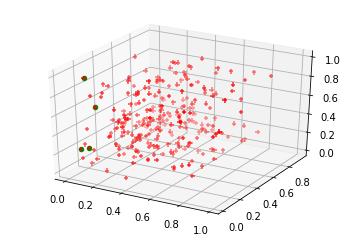

In [6]:
# plot the dataset
# green dot is the initial/random starting point of clusters

# plot initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# pick random starting point
# in this case, just pick the first 'n' points as initial center
initcenter = x[0:n_cluster,:]
for i in range(0,n_cluster):
    ax.scatter(initcenter[i,0], x[i,1], x[i,2], c='g', marker='o')
print initcenter
# plot the center to verify
ax.scatter(x[:,0], x[:,1], x[:,2], c='r', marker='+')
plt.show()
plt.clf()
plt.cla()
plt.close()

In [7]:
# calculate distance of x to each point in y
def calcDist(a,b):
    retval = np.array([])
    for i in b:
        retval = np.append(retval,np.array([np.linalg.norm(i - a)]))
    return retval

loop = 0 # finish after one loop
curJ = j_thresh + 1 # just to make sure the loop runs at least once
center = initcenter.copy()

Jprogress = np.array([]) # to make nice J plot
print "Starting center: ",center
while (loop<=max_loop) and (curJ >= j_thresh):
    cluster = np.empty((n_cluster,x.shape[0],3), float) # each points will be assigned to each cluster
    nbrelem = np.zeros(n_cluster, dtype=np.int) # initially each cluster is blank
    
    # put each points in cluster according to minimum distance
    for n in x:
        # the distance of this point to center of each cluster
        distance = calcDist(n,center)
        
        # find the center with the minimum distance and add this point to it
        cgroup = distance.argmin()
        z = nbrelem[cgroup]
        cluster[cgroup,z] = n
        nbrelem[cgroup] += 1

    # Compute the center point for next iteration
    sums = np.empty((n_cluster,3), float)
    oldcenter = center.copy()
    print "Iteration: ",loop
    for n in range(0,n_cluster):
        o = nbrelem[n]
        print " Cluster ",n," has ",o," Points "
        for m in range(0,o):
            if 'curclust' in locals():
                curclust = np.vstack([curclust,np.array(cluster[n,m])])
            else:
                curclust = np.array(np.array(cluster[n,m]))
        clustersum = np.sum(curclust,axis=0)
        center[n] = clustersum/nbrelem[n]
        print '  Old center: ',oldcenter[n]
        print '  New center: ',center[n]
        #print clustersum
        #print nbrelem[n]
        #print clustersum/nbrelem[n]
        del (curclust)
        
    # Calculate the difference in J (and stop iteration if it's below threshold)
    curJ = np.sum(np.square(center - oldcenter))
    print " >> CHANGES: ",curJ
    Jprogress = np.append(Jprogress,curJ)

    loop += 1


Starting center:  [[0.08000 0.10000 0.24000]
 [0.06000 0.05000 0.25000]
 [0.10000 0.15000 0.65000]
 [0.08000 0.08000 0.98000]]
Iteration:  0
 Cluster  0  has  135  Points 
  Old center:  [0.08000 0.10000 0.24000]
  New center:  [0.36293 0.46752 0.23533]
 Cluster  1  has  2  Points 
  Old center:  [0.06000 0.05000 0.25000]
  New center:  [0.07500 0.03500 0.21500]
 Cluster  2  has  117  Points 
  Old center:  [0.10000 0.15000 0.65000]
  New center:  [0.39317 0.48436 0.65410]
 Cluster  3  has  3  Points 
  Old center:  [0.08000 0.08000 0.98000]
  New center:  [0.20333 0.29667 0.97000]
 >> CHANGES:  0.476831229276
Iteration:  1
 Cluster  0  has  131  Points 
  Old center:  [0.36293 0.46752 0.23533]
  New center:  [0.37050 0.52431 0.24847]
 Cluster  1  has  21  Points 
  Old center:  [0.07500 0.03500 0.21500]
  New center:  [0.21319 0.09952 0.28429]
 Cluster  2  has  92  Points 
  Old center:  [0.39317 0.48436 0.65410]
  New center:  [0.44303 0.50457 0.68087]
 Cluster  3  has  13  Points 
 

[0.47683 0.06509 0.02523 0.00838 0.00270 0.00099]


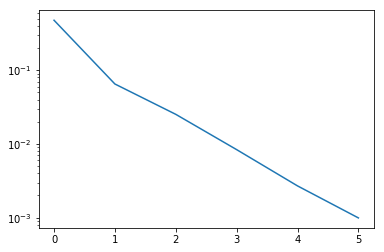

In [8]:
# Plot how J value gradually decreases
print Jprogress

# plot initialization
plt.plot(Jprogress) 
plt.yscale('log')
plt.show()

plt.clf()
plt.cla()
plt.close()

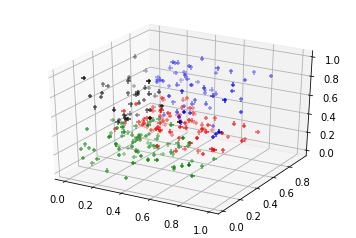

In [9]:
# K-means plot
#####

# plot initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.array(['r', 'g', 'b', 'k'])

for n in range(0,n_cluster):
    xdim = cluster[n,:nbrelem[n],0]
    ydim = cluster[n,:nbrelem[n],1]
    zdim = cluster[n,:nbrelem[n],2]
    col = colors[n]
    ax.scatter(xdim, ydim, zdim, c=col, marker='+')
plt.show()
plt.clf()
plt.cla()
plt.close()

In [12]:
# Gauss EM initialization from K-Means result
mu = center.copy()
lam = nbrelem.copy().astype(float)
lam /= np.sum(lam)
# identity covariance
sigma = np.empty((n_cluster,3,3))
for i in range(0,n_cluster):
    sigma[i] = np.identity(3)
    
# threshold limit
maxgaussloop = 100
gepsilon = 0.1

In [13]:
xsize,ndim = x.shape

gcluster = np.empty((n_cluster,xsize,3), float) # each points will be assigned to each cluster
gnbrelem = np.zeros(n_cluster, dtype=np.int) # initially each cluster is blank

P = lambda mu, s: np.linalg.det(s) ** -.5 ** 6.283 ** (-ndim/2.) \
                * np.exp(-.5 * np.einsum('ij, ij -> i',\
                        x - mu, np.dot(np.linalg.inv(s) , (x - mu).T).T ) ) 

R = np.zeros((xsize, n_cluster))
Lprogress = np.array([]) # to make nice L plot
       
gloop = 0
curL2 = gepsilon+1
r = range(n_cluster)
ll_old = 0
while (gloop<=maxgaussloop) and (curL2 >= gepsilon):
    ### E step
    for (k,l,m,s) in zip(r,lam,mu,sigma):
        R[:, k] = l * P(m, s)    

    ll = np.sum(np.log(np.sum(R, axis = 1)))
    R = (R.T / np.sum(R, axis = 1)).T

    N_ks = np.sum(R, axis = 0)
    
    ### M step
    for (k,nk) in zip(r,N_ks):
        mu[k] = np.sum(R[:, k] * x.T, axis = 1).T / nk
        x_mu = np.matrix(x - mu[k])
        sigma[k] = np.array(np.dot(np.multiply(x_mu.T,  R[:, k]), x_mu)/nk)
        lam[k] = nk/xsize

    curL2 = np.abs(ll - ll_old)
    print 'Iteration: ',gloop,' log likelihood:',curL2
    Lprogress = np.append(Lprogress,curL2)

    gloop += 1
    ll_old = ll

    #print lam
                                    
print '======'
for k in r:
    R[:, k] = lam[k] * P(mu[k], sigma[k])
for (l,n) in zip(R,x):
    cgroup = l.argmax()
    z = gnbrelem[cgroup]
    gcluster[cgroup,z] = n
    gnbrelem[cgroup] += 1
print 'Points per cluster: ',gnbrelem
#print gnbrelem.sum()

Iteration:  0  log likelihood: 32.0689270225
Iteration:  1  log likelihood: 1801.60934481
Iteration:  2  log likelihood: 0.347191004892
Iteration:  3  log likelihood: 0.674083961368
Iteration:  4  log likelihood: 1.37704171292
Iteration:  5  log likelihood: 2.81147345564
Iteration:  6  log likelihood: 5.17658576249
Iteration:  7  log likelihood: 7.54251794796
Iteration:  8  log likelihood: 8.20154769005
Iteration:  9  log likelihood: 7.40654237455
Iteration:  10  log likelihood: 6.7155375014
Iteration:  11  log likelihood: 6.61784397134
Iteration:  12  log likelihood: 6.79166096094
Iteration:  13  log likelihood: 6.99480210494
Iteration:  14  log likelihood: 7.26024974179
Iteration:  15  log likelihood: 7.8204448446
Iteration:  16  log likelihood: 9.16752618887
Iteration:  17  log likelihood: 12.2056771155
Iteration:  18  log likelihood: 18.339735859
Iteration:  19  log likelihood: 28.8194926354
Iteration:  20  log likelihood: 39.4369908093
Iteration:  21  log likelihood: 37.4082515028

[32.06893 1801.60934 0.34719 0.67408 1.37704 2.81147 5.17659 7.54252
 8.20155 7.40654 6.71554 6.61784 6.79166 6.99480 7.26025 7.82044 9.16753
 12.20568 18.33974 28.81949 39.43699 37.40825 24.67917 13.53619 7.07875
 3.78314 2.14462 1.37492 1.19277 1.56038 2.47339 3.60233 4.28476 4.31957
 3.99152 3.57078 3.18982 2.88820 2.66105 2.48922 2.35388 2.24106 2.14121
 2.04690 1.95071 1.84490 1.72325 1.58369 1.42953 1.26811 1.10799 0.95648
 0.81845 0.69631 0.59059 0.50057 0.42485 0.36178 0.30966 0.26691 0.23213
 0.20412 0.18186 0.16455 0.15155 0.14240 0.13676 0.13446 0.13546 0.13987
 0.14791 0.15994 0.17637 0.19762 0.22393 0.25509 0.29009 0.32677 0.36168
 0.39047 0.40883 0.41383 0.40489 0.38380 0.35404 0.31955 0.28383 0.24946
 0.21803 0.19032 0.16657 0.14668 0.13039 0.11735 0.10721 0.09966]


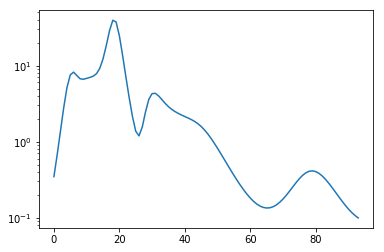

In [17]:
# Plot how J value gradually decreases
print Lprogress

# plot initialization
plt.plot(Lprogress[2:]) # discard the first entry
plt.yscale('log')
plt.show()

plt.clf()
plt.cla()
plt.close()

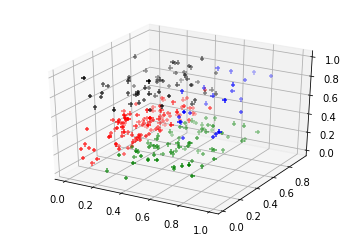

In [18]:
# Gaussian Mixture plot
######

# plot initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = np.array(['r', 'g', 'b', 'k'])

for n in range(0,n_cluster):
    xdim = gcluster[n,:gnbrelem[n],0]
    ydim = gcluster[n,:gnbrelem[n],1]
    zdim = gcluster[n,:gnbrelem[n],2]
    col = colors[n]
    ax.scatter(xdim, ydim, zdim, c=col, marker='+')
plt.show()
plt.clf()
plt.cla()
plt.close()